# Objectives
### This course used real-life dataset "coffee listings from all walmart stores"
1. Sampling, sampling bias and Pseudo-random number generation
2. Sampling methods 
 - Simple random sampling and systematic sampling
 - Stratified and weighted random sampling
 - Cluster sampling 
3. Sampling distribution and sample size
4. Bootstrap
 - Sampling and bootstrap distributions
 - Confidence interval

## 1. Introduction to Sampling

### 1.1 Introduction to Sampling
- Population and sample
- **df.sample(n=19)** returns a ramdon subset of rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Clean the dataset**

In [4]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


**coffee dataset**

In [2]:
path = '/QXJ/Python/Datacamp/Statistics/Sampling/coffee_ratings_full.feather'
coffee_ratings = pd.read_feather(path)
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [9]:
coffee_ratings.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [11]:
coffee_ratings.isna().sum()

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      315
ico_number                151
company                   209
altitude                  226
region                     59
producer                  231
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         169
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

In [14]:
coffee_ratings['species'].value_counts(ascending = False)

Arabica    1310
Robusta      28
Name: species, dtype: int64

### 1.2 Sample bias: convenience sampling 
- The sample is collected by the easiest method, so the samples are not representative of population 
- Use histogram to avoid the bias 

**random sampling vs. convenence sampling**

In [15]:
coffee_ratings['total_cup_points'].mean()

82.15120328849018

In [18]:
# convenience sampling 
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10['total_cup_points'].mean()

89.1

- *the convenience sampling has a larger mean than the population*

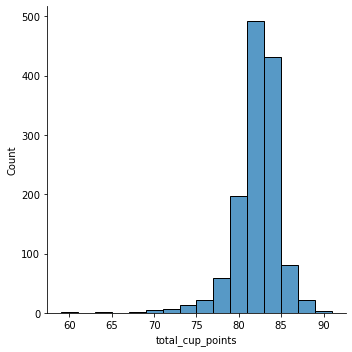

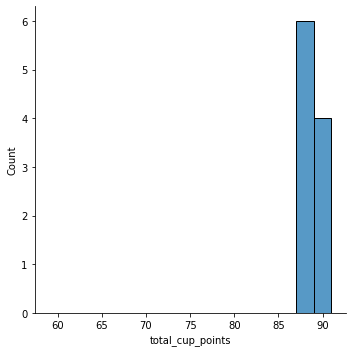

In [25]:
sns.displot(x='total_cup_points', data = coffee_ratings, bins = np.arange(59,93,2))
sns.displot(x='total_cup_points', data = coffee_ratings_first10, bins = np.arange(59,93,2))
plt.show()

82.66699999999999


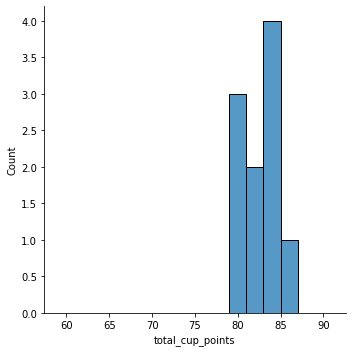

In [27]:
coffee_ratings_samples = coffee_ratings.sample(n=10)
print(coffee_ratings_samples['total_cup_points'].mean())

sns.displot(x='total_cup_points', data = coffee_ratings_samples, bins = np.arange(59,93,2))
plt.show()

### 1.3 Pseudo-random number generation
- True random numers: generated from physical processes, like flipping coines
- Persudo-random number generation is fast and cheap: it is calculated from the previous random number
- The first "random" number calculated from a seed: the same seed value yields the same random values
- numpy.random, such as np.random.beta()
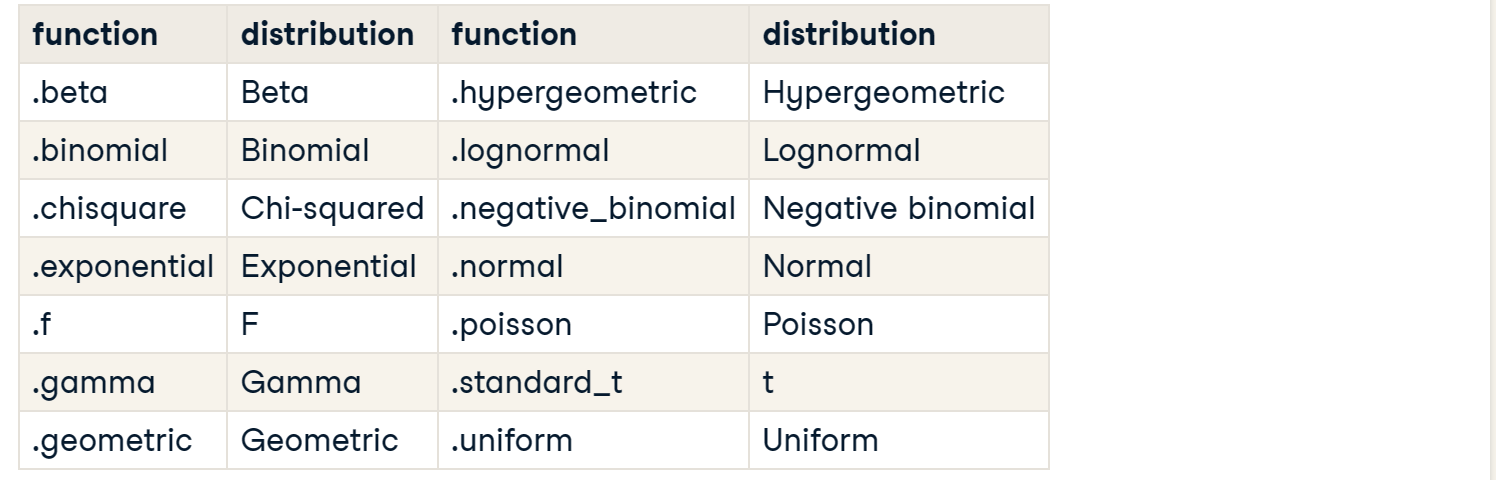

In [52]:
# a, b specify distribution parameters: from a continous distribution
randoms = np.random.beta(a = 2, b = 2, size = 2000)
randoms[:5]

array([0.719966  , 0.75161076, 0.77467119, 0.38000971, 0.17111321])

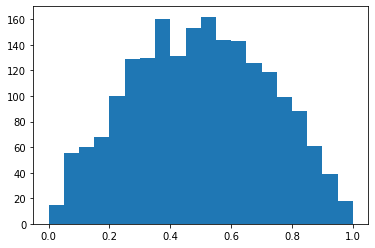

In [53]:
# visualize
plt.hist(randoms, bins = np.arange(0, 1.05, 0.05))
plt.show()

In [56]:
# set seed with numpy 
np.random.seed(20000)

In [57]:
# generate Pseudo-random numbers from normal distribution
# loc = mean, scale = standard deviation
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([3.52871857, 1.54711927])

In [59]:
# set seed as same as the last one 
np.random.seed(20000)

In [60]:
# second call to get different random number
np.random.normal(loc = 2, scale = 1.5, size = 2)
# starting from the same seed to get the same random numbers

array([3.52871857, 1.54711927])

In [61]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=500)
uniforms[:5]

array([-1.34312354, -1.91331102, -2.5375613 ,  1.70383103, -0.82820154])

## 2. The methods to sampling from the population

### 1.1 Simple random and systematic sampling
- Simple random method 
- System sampling method by defining the interval 
 - to decide how big is the interval between rows for a given sample size
 - troubleshoot
 - shuffle + systematic sample = random sample

**simple randome method**

In [4]:
# simple randome method
# use random_state to set the seed 
coffee_ratings.sample(n=5, random_state = 100)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
12,87.92,Arabica,cqi q coffee sample representative,United States,los cedros,None,None,unknown,coffee quality institute,meters above sea level: 1.943,...,None,0.0,"March 12th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1943.0,1943.0,1943.0
306,83.75,Arabica,exportadora de cafe condor s.a,Colombia,None,None,bonanza - armenia,3-68-0049,exportadora de cafe condor s.a,1750 msnm,...,Blue-Green,1.0,"November 22nd, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
815,81.92,Arabica,juan luis alvarado romero,Guatemala,la esperanza,11/23/0633,beneficio ixchel,11/23/0633,"unex guatemala, s.a.",1901,...,Green,1.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1901.0,1901.0,1901.0
157,84.58,Arabica,nucoffee,Brazil,fazenda vista alegre,None,None,002/1251/0076,nucoffee,1100m,...,Blue-Green,1.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1100.0,1100.0,1100.0


**systematic sampling method**

In [5]:
# system sampling method 
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)

1338


In [6]:
# decide the interval 
interval_ = pop_size/sample_size
# to discard the fractional part
interval = pop_size//sample_size
print(interval_)
print(interval)

267.6
267


In [7]:
# select the rows with interval of 280
# :: to select every 280 row from zero to the end 
coffee_ratings.iloc[::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


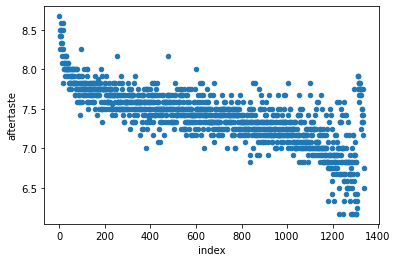

In [11]:
# The trouble with systematic sampling 
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x='index', y='aftertaste', kind = 'scatter')
plt.show()

**Systematic sampling is only safe if we do not see a patter in scatter plot**
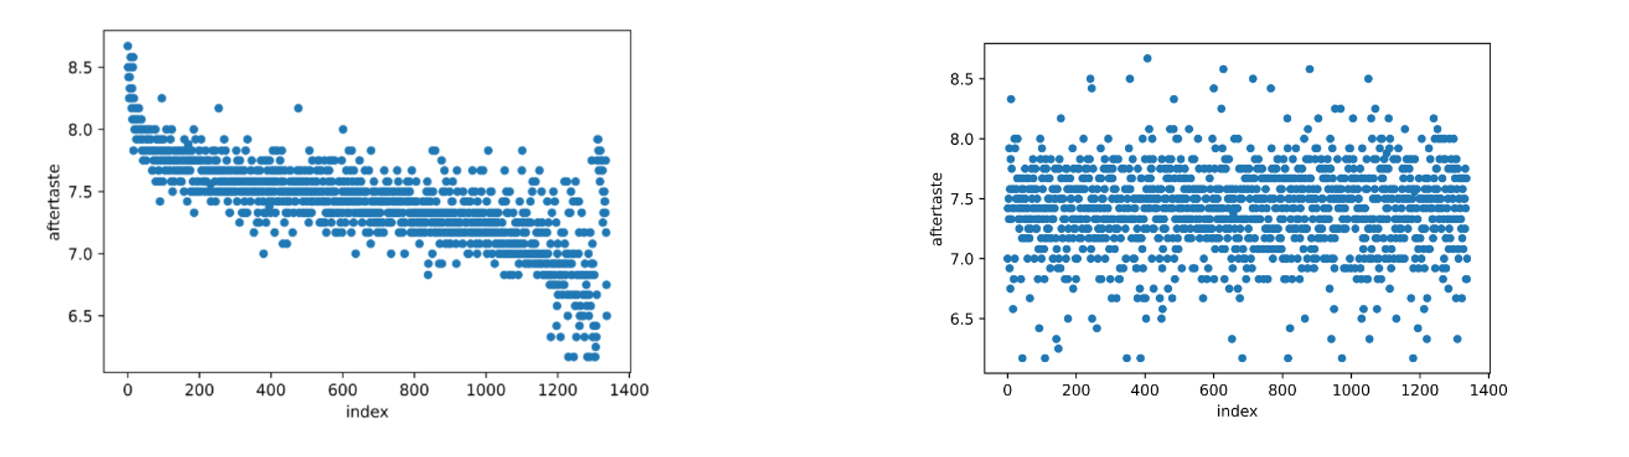

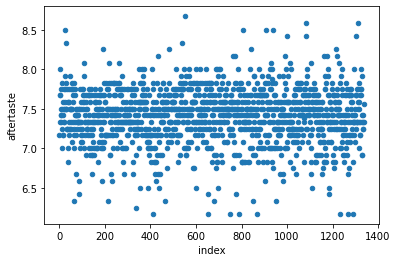

In [13]:
# making systematic sampling safe
# frac to specify the proportion of the dataset to return in the sample, 
# rather than the absolute number of rows that n specifies
# frac = 1 select the whole dataset but shuffle the rows
shuffled = coffee_ratings.sample(frac=1)

# after shuffling reset the index
# chain reset_index() create a column containing these new indexes
shuffled = shuffled.reset_index(drop = True).reset_index()

# after shuffled, the small indexes have also the smooth rating points
shuffled.plot(x = 'index', y = 'aftertaste', kind = 'scatter')
plt.show()

### 2.2 Stratified and weighted random sampling
- Stratified sampling: a technique allows us to sample a population that containes subgroups (split the population into subgroup -> sampling from each subgroup)
 - equal proportion from the population
 - equal counts from the population 
 - different weigt from the population
- Problem: too expensive because we need to collect data from different subgroup

In [15]:
top_countries = coffee_ratings['country_of_origin'].value_counts(ascending = False)
top_countries.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

In [58]:
top_counted_countries = ['Mexico','Colombia','Guatemala','Brazil','Taiwan','United States (Hawaii)']
coffee_ratings_top = coffee_ratings[coffee_ratings['country_of_origin'].isin(top_counted_countries)]
coffee_ratings_samp = coffee_ratings_top.sample(frac = 0.1, random_state = 1)
coffee_ratings_samp.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.00,1320.00,1320.00
789,82.08,Arabica,rosa aurora falcon fernandez,Mexico,bola de oro,None,"coatepec, ver",1104362837,None,1250,...,Green,11.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1250.00,1250.00,1250.00
430,83.25,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,KF313630,kona pacific farmers cooperative,None,...,Bluish-Green,4.0,"March 21st, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
1208,78.75,Arabica,juan luis alvarado romero,Guatemala,la castellana,None,beneficio ixchel,11/23/1020,"unex guatemala, s.a.",4300,...,Green,8.0,"July 5th, 2014",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
1286,74.42,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KPBP 022414,kona pacific farmers cooperative,None,...,Blue-Green,2.0,"March 13th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN


In [59]:
coffee_ratings_top['country_of_origin'].value_counts(normalize = True)

Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: country_of_origin, dtype: float64

In [18]:
# population proportion
coffee_ratings['country_of_origin'].value_counts(normalize = True).head(6)

Mexico                    0.176515
Colombia                  0.136874
Guatemala                 0.135378
Brazil                    0.098728
Taiwan                    0.056096
United States (Hawaii)    0.054600
Name: country_of_origin, dtype: float64

**Proportional stratified sampling**

*The different proportion from the population and samples could be a problem*

In [19]:
# proportional stratified sampling 
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin').sample(frac = 0.1, random_state = 1)
coffee_ratings_strat['country_of_origin'].value_counts(normalize = True)

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

**Equal counts stratified sampling**
*eqal counts from the population*

In [20]:
# equal counts stratified sampling 
coffee_ratings_eq = coffee_ratings_top.groupby('country_of_origin').sample(n = 15, random_state = 1)
coffee_ratings_eq['country_of_origin'].value_counts(normalize = True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

**Weighted random sampling**
*adjust the relative probability of a row being sampled*
<br>
It is common in political polling because we need to correct under- or over- representation of demographic group

In [34]:
# create a condition 
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'

# where condition to set a weight of 2 for rows match the condition
# a weight of 1 for rows do not match the condition
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)
coffee_ratings_weight = coffee_ratings_weight.reset_index()
coffee_ratings_weight.head()

C:\Users\QXJ\AppData\Local\Temp\ipykernel_18400\189385070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)


,index,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,weight
0,2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,...,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0,1
1,5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,...,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN,1
2,13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,...,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.6,609.6,609.6,1
3,22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,...,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0,1
4,25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,...,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.0,1250.0,1250.0,1


In [30]:
# This means each row is randomly sampled, Taiwanese coffee has 2 times of chances to be picked
coffee_ratings_weight = coffee_ratings_weight.sample(frac = 0.1, weights = 'weight')

# 10% weighted sample: 
coffee_ratings_weight['country_of_origin'].value_counts(normalize = True)

Mexico                    0.261364
Guatemala                 0.204545
Colombia                  0.181818
Taiwan                    0.147727
Brazil                    0.113636
United States (Hawaii)    0.090909
Name: country_of_origin, dtype: float64

### 2.3 Cluster sampling (multistage sampling)
- Use simple random sampling to pick some subgroups 
- Use simple random sampling on only those subgroups 
- Cluster sampling 
 - **random sample** from the subgroups, such as choose 5 types from 10 types
 - subsetting data of these 5 types from the whole dateset
 - categorize the type coloumn and remove_unused_categories()
 - group by the types and sampling directly equal rows from each type - **equal counts stratified sampling**

In [25]:
varieties_pop = list(coffee_ratings['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

In [49]:
# sampling subgroups from a list of subgroups 
import random
# to get 10 random subgroups
varieties_samp = random.sample(varieties_pop, k = 3)
varieties_samp

['Ruiru 11', 'Mandheling', 'Other']

In [50]:
# sampling each group
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition].reset_index(drop = True)
coffee_ratings_cluster.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,88.75,Arabica,hugo valdivia,Peru,None,None,hvc,None,richmond investment-coffee department,None,...,Bluish-Green,0.0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
3,88.25,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,None,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4.0,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5
4,87.92,Arabica,cqi q coffee sample representative,United States,el filo,None,None,unknown,coffee quality institute,meters above sea level: 1.872,...,None,0.0,"March 12th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1872.0,1872.0,1872.0


In [51]:
len(coffee_ratings_cluster)

115

In [52]:
coffee_ratings_cluster.groupby('variety').sample(n=2, random_state= 1)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
20,84.42,Arabica,aulia arif syahri,Indonesia,darmawi,MANDHELING BRASTAGI,dry mill,To be advice,pt. olam indonesia,1400,...,Blue-Green,3.0,"March 14th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
91,80.67,Arabica,aulia arif syahri,Indonesia,darmawi,None,surbakti / pt.olam indonesia,015/1691/006,pt. olam indonesia,1200-1500,...,Blue-Green,1.0,"November 9th, 2016",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1500.0,1350.0
96,80.42,Arabica,adam ciruli ye,China,alicia's farm,None,alicia's farm,CNY,yunnan new century tech inc.,1700,...,Green,14.0,"January 17th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1700.0,1700.0,1700.0
47,82.83,Arabica,"sunvirtue co., ltd.",Vietnam,apollo estate,None,apollo estate,None,"sunvirtue co., ltd.",1040,...,Green,0.0,"January 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1040.0,1040.0,1040.0
37,83.50,Arabica,damari absalome,"Tanzania, United Republic Of",ano family,None,arusha,CA007,tawoca,1400m,...,Green,21.0,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1400.0,1400.0,1400.0
60,82.42,Arabica,gladness obed pallangyo,"Tanzania, United Republic Of",nguruma,None,None,GOP,tawoca,2285,...,Green,7.0,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,2285.0,2285.0,2285.0


In [53]:
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')

In [54]:
# remove levels with 0 rows because you need sampling from each row 
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()
coffee_ratings_cluster.head(5)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,88.75,Arabica,hugo valdivia,Peru,None,None,hvc,None,richmond investment-coffee department,None,...,Bluish-Green,0.0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
3,88.25,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,None,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4.0,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5
4,87.92,Arabica,cqi q coffee sample representative,United States,el filo,None,None,unknown,coffee quality institute,meters above sea level: 1.872,...,None,0.0,"March 12th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1872.0,1872.0,1872.0


In [55]:
len(coffee_ratings_cluster)

115

In [56]:
coffee_ratings_cluster.groupby('variety').sample(n=2, random_state= 1)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
20,84.42,Arabica,aulia arif syahri,Indonesia,darmawi,MANDHELING BRASTAGI,dry mill,To be advice,pt. olam indonesia,1400,...,Blue-Green,3.0,"March 14th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
91,80.67,Arabica,aulia arif syahri,Indonesia,darmawi,None,surbakti / pt.olam indonesia,015/1691/006,pt. olam indonesia,1200-1500,...,Blue-Green,1.0,"November 9th, 2016",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1500.0,1350.0
96,80.42,Arabica,adam ciruli ye,China,alicia's farm,None,alicia's farm,CNY,yunnan new century tech inc.,1700,...,Green,14.0,"January 17th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1700.0,1700.0,1700.0
47,82.83,Arabica,"sunvirtue co., ltd.",Vietnam,apollo estate,None,apollo estate,None,"sunvirtue co., ltd.",1040,...,Green,0.0,"January 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1040.0,1040.0,1040.0
37,83.50,Arabica,damari absalome,"Tanzania, United Republic Of",ano family,None,arusha,CA007,tawoca,1400m,...,Green,21.0,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1400.0,1400.0,1400.0
60,82.42,Arabica,gladness obed pallangyo,"Tanzania, United Republic Of",nguruma,None,None,GOP,tawoca,2285,...,Green,7.0,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,2285.0,2285.0,2285.0


**Category type**
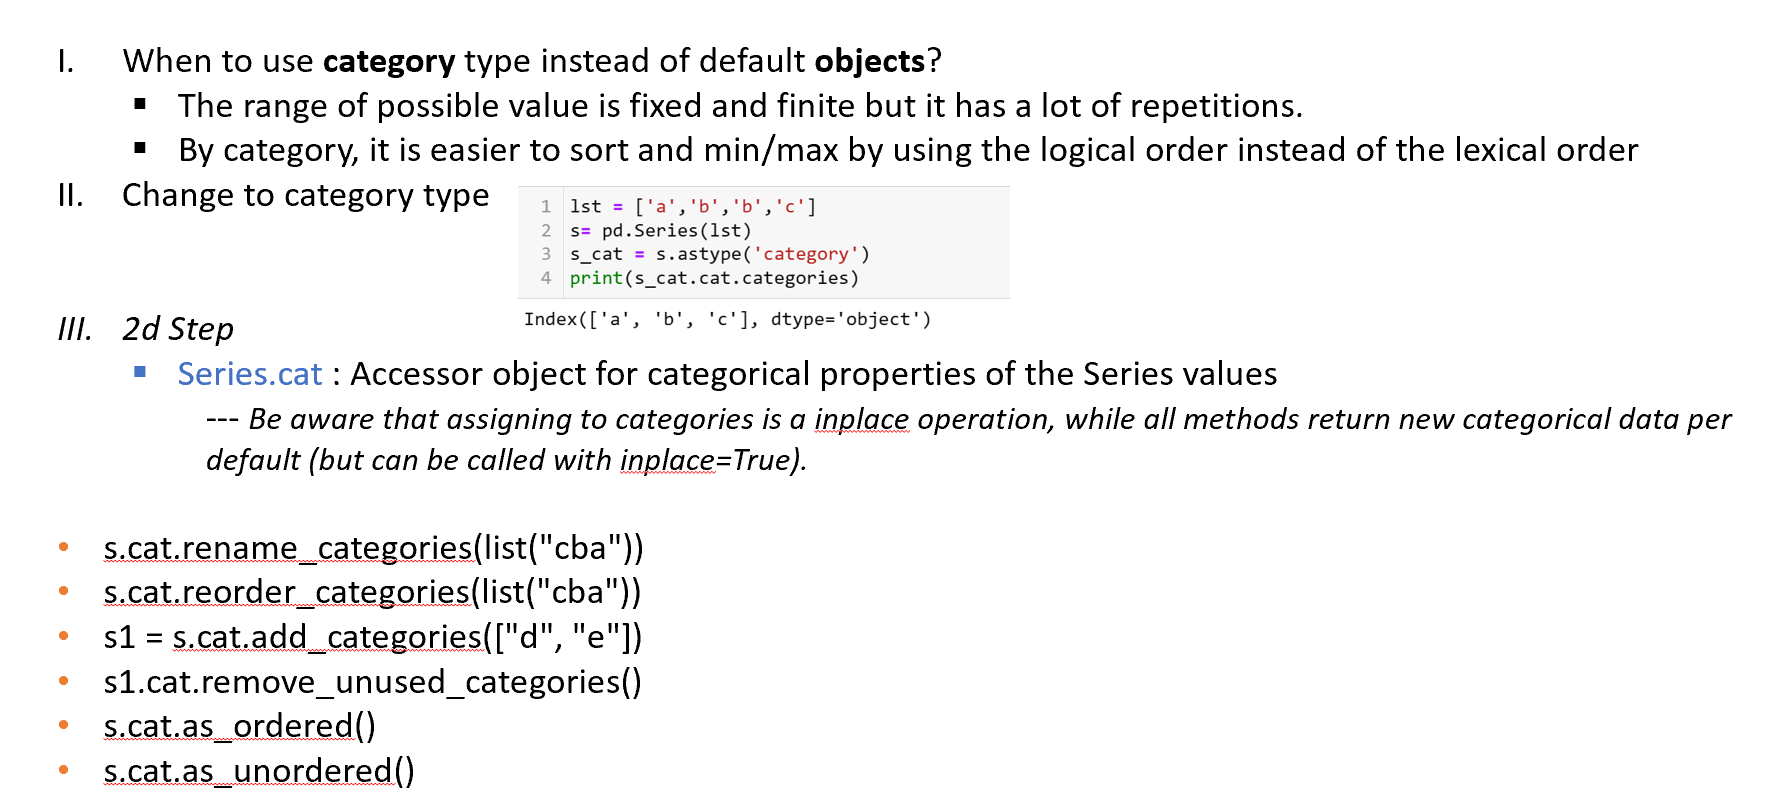

### Comparison of three sampling methods
- All the sampling methods return similar number of rows
- All the sampling methods return a similar mean as the population mean.
- Clustering sampling is a tiny little worse in the mean because it takes the samples of chosen categories. For example, if the type category is an important metric for the analysis, it is a bad idea to use cluster sampling. 


In [60]:
# set up
top_counted_countries = ['Mexico','Colombia','Guatemala','Brazil','Taiwan','United States (Hawaii)']
coffee_ratings_top = coffee_ratings[coffee_ratings['country_of_origin'].isin(top_counted_countries)]
coffee_ratings_top.shape

(880, 43)

In [61]:
# simple random sampling & systematic sampling 
coffee_ratings_srs = coffee_ratings_top.sample(frac = 1/3, random_state = 1)
coffee_ratings_srs.shape

(293, 43)

In [64]:
# stratified sampling 
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin').sample(frac = 1/3, random_state = 1)
coffee_ratings_strat.shape

(293, 43)

In [74]:
# clustering sampling 
import random
top_countries_samp = random.sample(top_counted_countries, k =2)
coffee_ratings_cluster = coffee_ratings_top[coffee_ratings_top['country_of_origin'].isin(top_countries_samp)]
coffee_ratings_cluster = coffee_ratings_cluster.groupby('country_of_origin').sample(n=len(coffee_ratings_top)//6,random_state = 1)
coffee_ratings_cluster.shape

(292, 43)

In [76]:
# calculating mean 
# pop mean
print(coffee_ratings_top['total_cup_points'].mean())
print(coffee_ratings_srs['total_cup_points'].mean())
print(coffee_ratings_strat['total_cup_points'].mean())
print(coffee_ratings_cluster['total_cup_points'].mean())

81.94699999999993
81.92320819112624
81.97269624573366
81.33160958904104


In [78]:
# mean by countries- pop
print(coffee_ratings_top.groupby('country_of_origin')['total_cup_points'].mean())

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64


In [79]:
print(coffee_ratings_srs.groupby('country_of_origin')['total_cup_points'].mean())

country_of_origin
Brazil                    82.041026
Colombia                  83.297679
Guatemala                 82.108000
Mexico                    80.519744
Taiwan                    81.858095
United States (Hawaii)    82.430882
Name: total_cup_points, dtype: float64


In [81]:
print(coffee_ratings_strat.groupby('country_of_origin')['total_cup_points'].mean())

country_of_origin
Brazil                    82.370909
Colombia                  83.203443
Guatemala                 81.582167
Mexico                    81.079114
Taiwan                    81.734400
United States (Hawaii)    82.280417
Name: total_cup_points, dtype: float64


In [82]:
print(coffee_ratings_cluster.groupby('country_of_origin')['total_cup_points'].mean())

country_of_origin
Guatemala    81.826575
Mexico       80.836644
Name: total_cup_points, dtype: float64


## 3. Sampling Distributions
- Relative error of point estimates
- Sampling distribution, approximate sampling distribution
- Standard errors and the Central Limit Theorem

### 3.1 Relative error of point estimates
- really noise, particular for small sample
- the amplitude is initially steep, then flattens
- **relative error decreases to zero (when the sample size = population)**
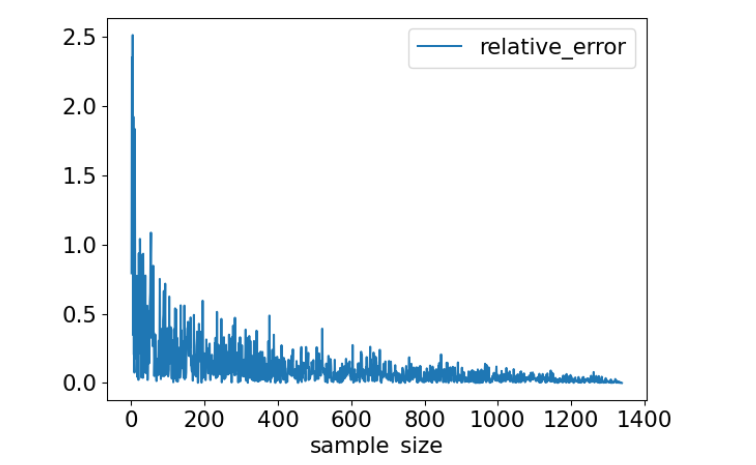

**How the size of sample affects the accuracy of the point estimte we calculated**
<br>
- *larger sample size will give us a more accurate result*
- **relative error**: absolute difference of the population and a sample mean

In [3]:
# sample size 
len(coffee_ratings.sample(n=300))

300

In [4]:
len(coffee_ratings.sample(frac = 0.25))

334

In [7]:
# various sample size 
# population parameter
population_mean = coffee_ratings['total_cup_points'].mean()
print(population_mean)

# point estimate
sample_mean = coffee_ratings.sample(n=10)['total_cup_points'].mean()
print(sample_mean)
sample_mean2 = coffee_ratings.sample(n=200)['total_cup_points'].mean()
print(sample_mean2)

82.15120328849018
82.368
82.42225000000002


In [8]:
# relative error as a percentage
rel_error_pct = 100 * abs(population_mean - sample_mean)/population_mean
rel_error_pct

0.26389961781629734

In [ ]:
errors.plot(x='sample_size', y= 'relation_error', kind = 'line')
plt.show

### 3.2 Creating a sampling distribution
- **A sample distribution** is a distribution of replicates of points estimates
- bigger sample results a narrower range
- closer to the normal distribution 

In [17]:
# compare the sample distribution n = 30
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(coffee_ratings.sample(n=30)['total_cup_points'].mean())

print(mean_cup_points_1000[:10])
print(len(mean_cup_points_1000))

[82.89833333333333, 81.43333333333332, 82.06966666666668, 81.594, 81.484, 81.18033333333332, 82.23566666666666, 81.83166666666669, 82.22966666666666, 82.236]
1000


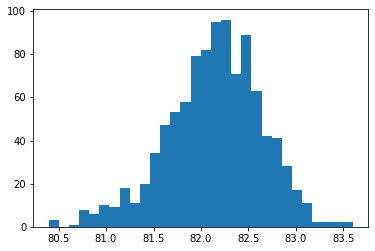

In [12]:
plt.hist(mean_cup_points_1000, bins = 30)
plt.show()

# mean of sample size = 30

In [13]:
# n = 300
mean_cup_points_1000_more = []
for i in range(1000):
    mean_cup_points_1000_more.append(coffee_ratings.sample(n=300)['total_cup_points'].mean())

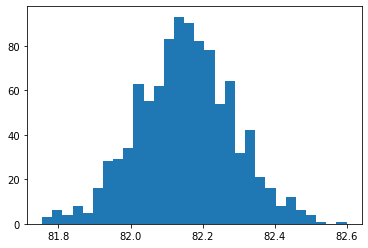

In [16]:
# visualize the sample distribution
plt.hist(mean_cup_points_1000_more, bins = 30)
plt.show()
# bigger sample results to a narrower range
# mean of sample size = 300

### 3.3 Approximate sampling distributions

**4 dice**
- expand_grid(dict) function generates all the combination (itertools package)

In [162]:
from itertools import product
dice = expand_grid(
{'dice1': [1,2,3,4,5,6],
'dice2': [1,2,3,4,5,6],
'dice3': [1,2,3,4,5,6],
'dice4': [1,2,3,4,5,6]})
dice
# four-sided 

,dice1,dice2,dice3,dice4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


In [163]:
# mean roll
dice['mean_roll'] = (dice['dice1'] + dice['dice2'] + 
                     dice['dice3'] + dice['dice4'])/4
dice

,dice1,dice2,dice3,dice4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


<AxesSubplot:>

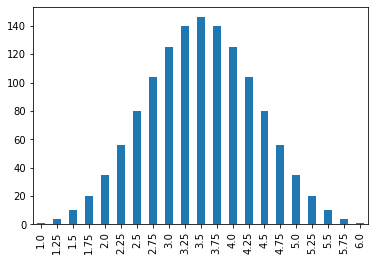

In [165]:
# plpt a barplot for discrete values 
# sampling distribution of the mean roll
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort = False).plot(kind='bar')

In [168]:
# The number of outcomes increase
n_dice = list(range(1,101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)
    
outcomes = pd.DataFrame(
{'n_dice':n_dice,
'n_outcomes':n_outcomes})

<AxesSubplot:xlabel='n_dice', ylabel='n_outcomes'>

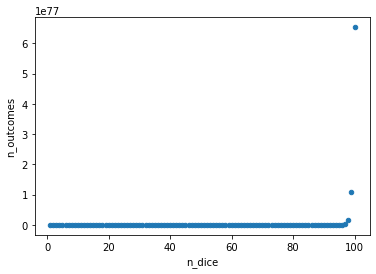

In [169]:
outcomes.plot(x='n_dice',y='n_outcomes',kind='scatter')
# It is getting complicated to calculate sampling mean while the dateset is getting larger

In [20]:
# simulating the mean of four dice rolls
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1,7)), size = 4, replace = True).mean())
# sample 1 to 6, 4 times, with replacement
print(sample_means_1000[:10])

[4.5, 3.0, 1.75, 4.25, 2.25, 3.0, 3.0, 3.0, 4.25, 3.25]


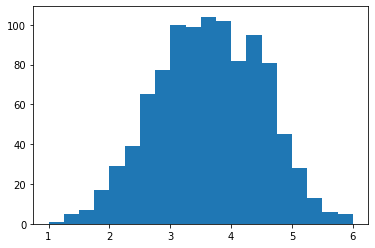

In [22]:
plt.hist(sample_means_1000, bins = 20)
plt.show()

**Use approximate sampling distribution by simulating the mean**

In [172]:
samp_means_1000 = []
for i in range(1000):
    samp_means_1000.append(
    np.random.choice(list(range(1,7)),size =4, replace = True).mean())
samp_means_1000[:10]

[3.5, 3.25, 3.5, 2.5, 3.75, 3.5, 2.75, 3.5, 5.0, 3.0]

(array([  3.,   7.,  16.,  31.,  48.,  50.,  79.,  87., 114., 106., 122.,
         86.,  79.,  72.,  47.,  32.,  12.,   4.,   4.,   1.]),
 array([1.25  , 1.4875, 1.725 , 1.9625, 2.2   , 2.4375, 2.675 , 2.9125,
        3.15  , 3.3875, 3.625 , 3.8625, 4.1   , 4.3375, 4.575 , 4.8125,
        5.05  , 5.2875, 5.525 , 5.7625, 6.    ]),
 <BarContainer object of 20 artists>)

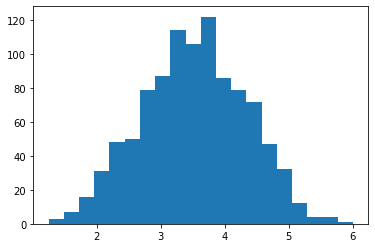

In [174]:
plt.hist(samp_means_1000, bins = 20)
# it is very close to the sampling distribution

### 3.3 Standard errors and the Central Limit Theorem
- As the sample size increases,
    - The distribution of the average get closer to be the **The Gaussian distribution** (also known as the normal distribution)
    - The width of distribution shrinks as the sample size increases
- **standard error**: standard deviation of the sampling distribution, approximately to the **population std / sqrt(sample size)**
> **Central Limit Theorem**: average of independent samples have approximately normal distribution 

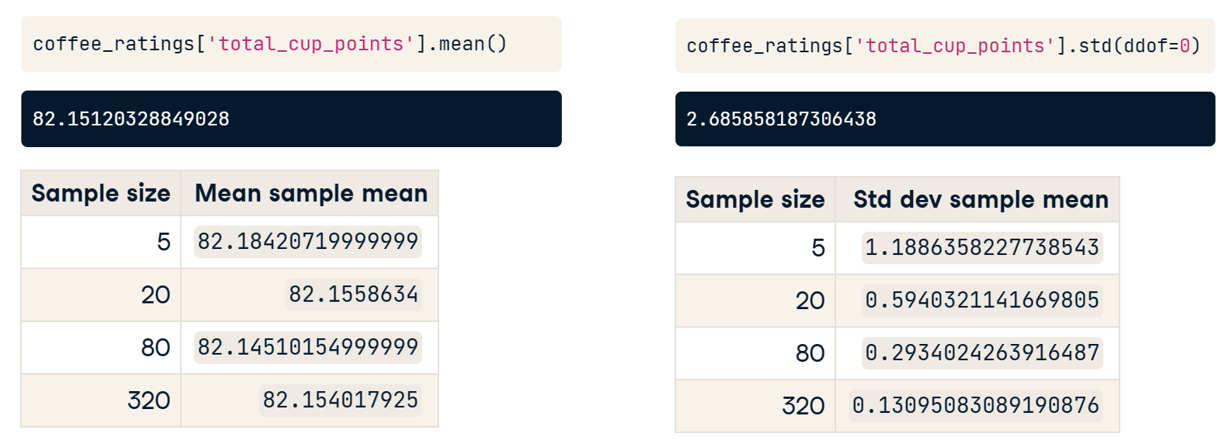
*With the sample size increases, the standard error decreases*

In [19]:
coffee_ratings['total_cup_points'].std(ddof=0)
# sepcify ddof = 0 when calling .std() on population
# default - ddof = 1 - is calculating the sampling standard deviation

2.685858187306436

## 4. Bootstrap Distributions
- Sampling with replacement = resampling 
- Same size as the original sample - we treat it as a new theoretical population 
- Bootstrapping usage cases: 
 - Develop understanding of sampling variablitity using a singlle sample
 - We cannot sample the population mulitple times to create a sampling distribution
> Bootstrap is the opposite of sampling from a population: we treat the datasetas a sample and use it to build up a theoretical population

### 4.1 Introduction to bootstrapping
- **Sampling: treat the dataset as a population**
- **Bootstrapping: treat the dataset as a sample and build a theoretical population from it**
    - use case: develop understanding of sampling variability using a single sample
    - Make a resample of the same size as the original sample - sampling with replacement is a proxy
    - Calculate the statistic of interest for this bootstrap sample (mean is one of the choices)
    - Repeat steps 1 and 2 many times to get lots of these bootstrap statistics
    ---> *The resulting statistics are bootstrap statistics, and they form a bootstrap distribution*
- The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

**coffee data preparation**

In [3]:
coffee_focus = coffee_ratings[['variety', 'country_of_origin', 'flavor']]
coffee_focus = coffee_focus.reset_index()
coffee_focus.head()

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50


*A single bootstrapping*

In [4]:
# resampling with .sample()
# frac = 1 resample the same size as the original sample
coffee_resamp = coffee_focus.sample(frac=1, replace =True)
coffee_resamp.head()

,index,variety,country_of_origin,flavor
948,948,None,Colombia,7.33
568,568,Other,United States,7.58
678,678,Caturra,Guatemala,7.42
833,833,Bourbon,Guatemala,7.50
231,231,Mandheling,Indonesia,7.88


In [5]:
# repeated coffees
# shows how many times each coffee ended up in the resampled dataset
coffee_resamp['index'].value_counts()

889     6
341     6
1212    5
1315    5
995     5
       ..
924     1
1324    1
238     1
1173    1
1288    1
Name: index, Length: 864, dtype: int64

In [6]:
# distinct index values in the resampled dataset
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset = 'index'))
print(num_unique_coffees)

864


In [8]:
print(len(coffee_ratings)- num_unique_coffees)
# 474 rows of the original dataset have not been used in resampling dataset

474


**Bootstrapping coffee mean**

In [21]:
bootstrap_distn= mean_flavor_1000 = []
for i in range(1000):
    mean_flavor_1000.append(
        np.mean(coffee_resamp.sample(frac = 1, replace = True)['flavor'])
    )
print(mean_flavor_1000[:10])

[7.515418535127052, 7.535911808669652, 7.539125560538116, 7.5327354260089665, 7.5419431988041845, 7.524663677130044, 7.524005979073242, 7.520530642750372, 7.537705530642749, 7.539252615844543]


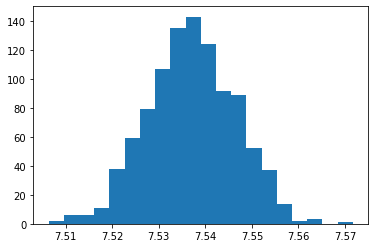

In [10]:
plt.hist(mean_reviews_1000, bins = 20)
plt.show()

# it is close to the normal distribution

### 4.2 Comparing sampling and bootstrap distributions
- Bootstrapping mean is close to the sample mean: bootstrapping cannot correct any bias between the sample and population -> Thus sampling mean is a better estimate of the population mean 
- Bootstrapping std is a better estimate of the population std 

*Quality the mean*

In [14]:
# population mean 
coffee_ratings['flavor'].mean()

7.526046337817636

In [47]:
# sample mean
coffee_sample = coffee_focus.sample(frac=0.5)
print(np.mean(coffee_sample['flavor']))

7.529701046337814


In [49]:
# Bootsraping mean
print(np.mean(mean_flavor_1000))

7.536341846038861


*Quality the standard deviation*

In [52]:
print(coffee_ratings['flavor'].std(ddof = 0))
print(np.std(coffee_resamp['flavor']))

# boostrapping distribution std
print(np.std(mean_flavor_1000, ddof = 1) * np.sqrt(1000))

0.3412548122462262
0.3445483954480103
0.2929600122565958


In [19]:
standard_error = np.std(mean_flavor_1000, ddof = 1)
standard_error * np.sqrt(1000)

0.2899730448496316

**Bootstrap distribution mean:**
- Usually close to the sample mean 
  - If the sampling is not representative, bootstrapping cannot correct biases
- However, we still can quantify variation
 - The standard deviation of the bootstrap **(estimated standard error)** can be used as a way to estimate this measure of uncertainty
 - **Population std. dev = std. Error * np.sqrt(sample size)** - *It is a good way to estimate the std of population by the std of bootstrap*
 - Estimated standard error -> standard deviation of the bootstrap distribution for a sample statistic

### 4.3 Confidence interval 
- "Values within 1 std" includes a large number of values from each of thee distributions
- To calculate: 
  - np.quantile()
  - inverse cumulative distribution function
    - PDF: the bell curve
    - CDF: integrate to get area under bell curve
    - Inv. CDF: flip x and y axes

**Bootstrap distribution of mean**

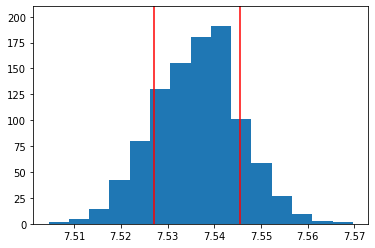

In [42]:
plt.hist(bootstrap_distn, bins = 15)
plt.axline(xy1=(7.527, 0), xy2=(7.527,200), color = 'red')
plt.axline(xy1=(7.5456, 0), xy2=(7.5456,200), color = 'red')
plt.show()

In [24]:
# mean of the resample 
np.mean(bootstrap_distn)

7.536341846038861

**Mean plus or minus 1 std - to create a confidence interval**

In [25]:
np.mean(bootstrap_distn) - np.std(bootstrap_distn, ddof = 1)

7.527077637018045

In [26]:
np.mean(bootstrap_distn) + np.std(bootstrap_distn, ddof = 1)

7.545606055059678

**confidence intervals**
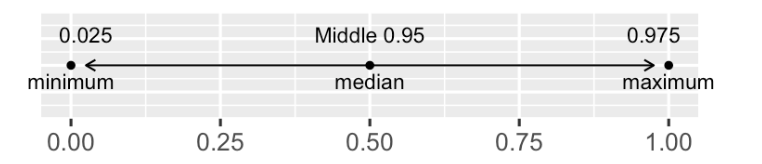

In [247]:
# CI = 95% , 0.975 - 0.025 = 0.95
lower_quant = np.quantile(bootstrap_distn, 0.025)
lower_quant

401.7142952720785

In [233]:
upper_quant = np.quantile(bootstrap_distn, 0.975)
upper_quant

517.6291034790364

**Inverse cumulative distribution**
- Probability density function(PDF): the bell curve
- Cumulative distribution function(CDF): integrate to get areaunder bell curve
- Inv. CDF: flip x and y axes

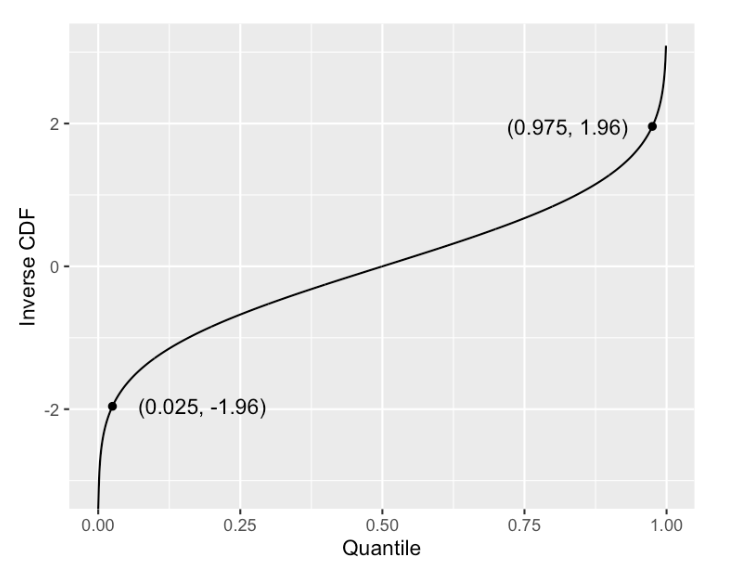

In [35]:
# calculate confidence interval 
# inverse CDF: it takes a quantile between 0 and 1 
# return the values of normal distribution for that quantile
# Normal distribution: loc = 0, scale = 1 is default
from scipy.stats import norm
norm.ppf(quantile, loc = 0, scale = 1)

1.6448536269514722

In [36]:
# the 2rd method to calculate confidence interval
point_estimate = np.mean(bootstrap_distn)
point_estimate

7.536341846038861

In [37]:
std_error = np.std(bootstrap_distn, ddof = 1)
std_error

0.009264209020816875

In [38]:
from scipy.stats import norm
lower = norm.ppf(0.025, loc = point_estimate, scale = std_error)
upper = norm.ppf(0.975, loc = point_estimate, scale = std_error)
print((lower, upper))

(7.518184330012809, 7.554499362064914)


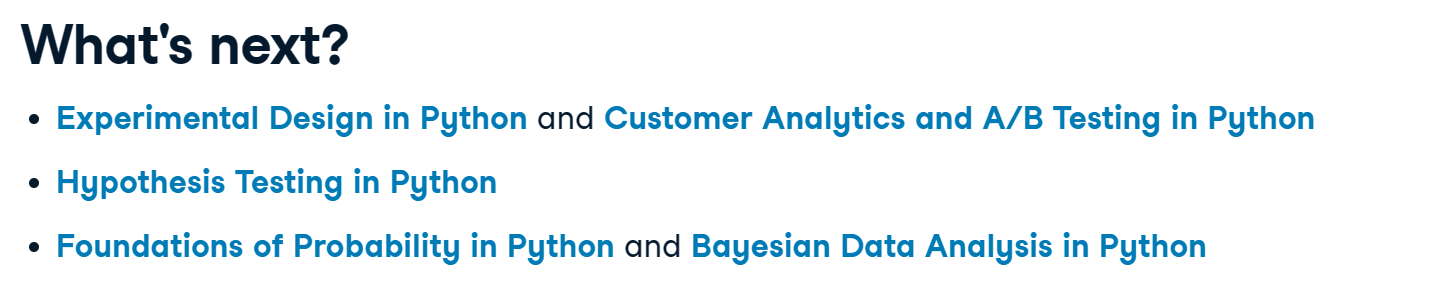